## Analisis EDA


=== INFORMACIÓN BÁSICA DEL DATASET ===

Dimensiones del DataFrame: (100, 3)

Columnas del DataFrame: ['edad', 'altura', 'peso']

Tipos de datos:
edad      float64
altura    float64
peso      float64
dtype: object

Valores nulos por columna:
edad      0
altura    0
peso      0
dtype: int64

Columnas numéricas: ['edad', 'altura', 'peso']

Estadísticas descriptivas:

=== ESTADÍSTICAS DESCRIPTIVAS ===
             edad      altura        peso
count  100.000000  100.000000  100.000000
mean    25.907814  171.434341   71.712349
std      5.117418   10.783917   12.632815
min     14.795943  147.387119   50.132217
25%     22.080327  163.343917   61.011492
50%     25.185818  171.759729   69.243531
75%     29.749549  178.897754   78.380365
max     37.527919  193.815078  105.579186


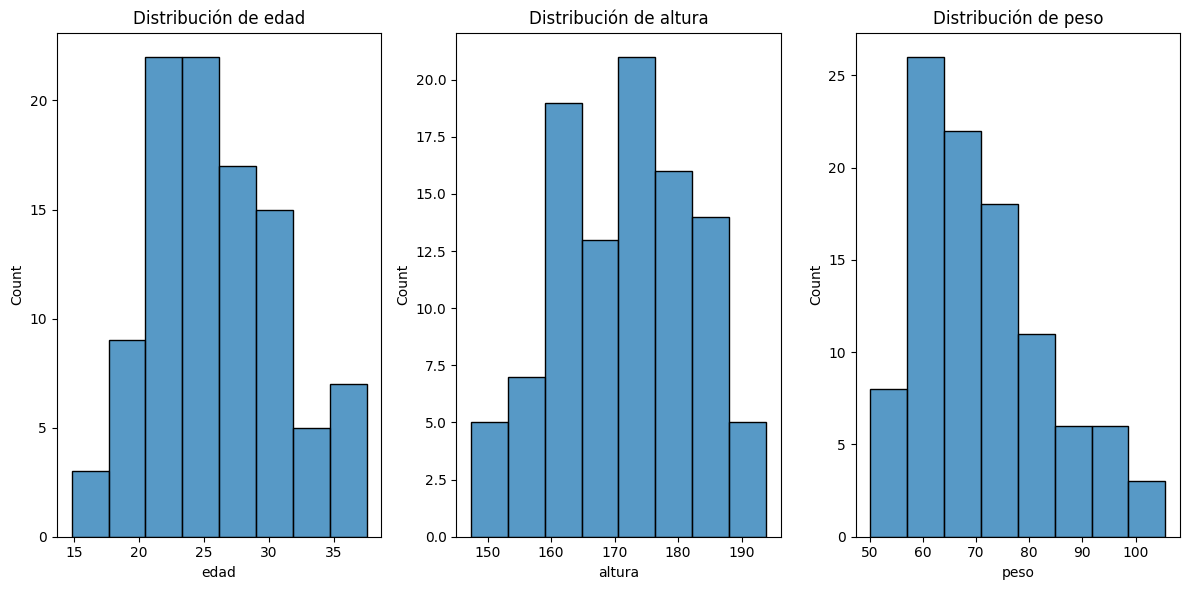

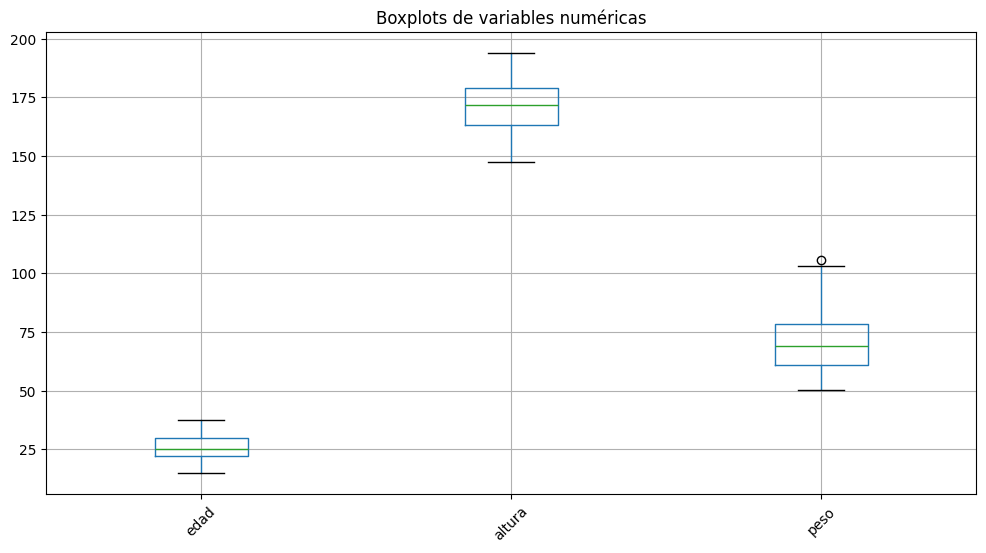

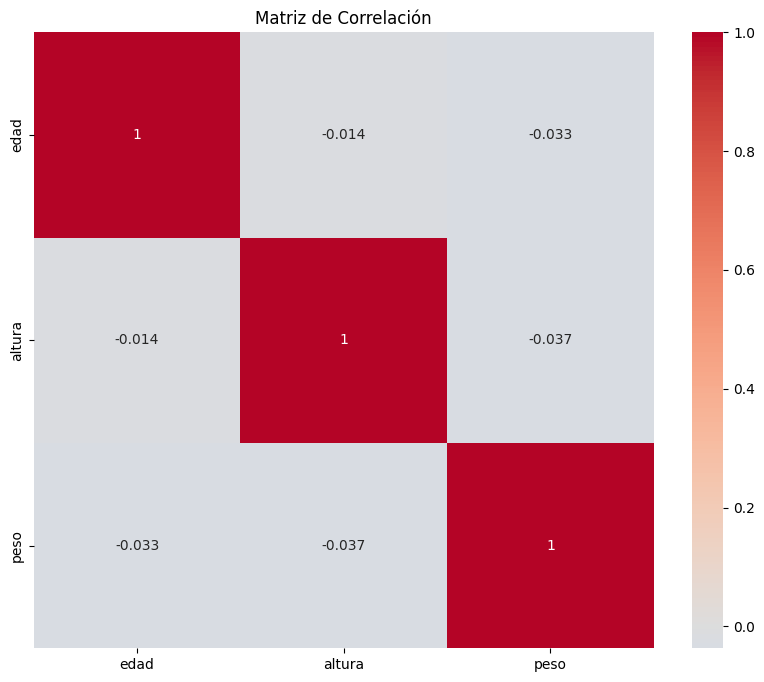


Detección de outliers:
        n_outliers  porcentaje
edad           0.0         0.0
altura         0.0         0.0
peso           1.0         1.0

Test de normalidad:
       estadístico   p_valor es_normal
edad      0.976611  0.072156      True
altura    0.987592   0.47861      True
peso      0.945652  0.000434     False

No hay columnas categóricas en el DataFrame para realizar análisis


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class BasicEDA:
    def __init__(self, data):
        """
        Inicializa la clase con un DataFrame
        
        Parameters:
        -----------
        data : pandas.DataFrame
            DataFrame a analizar
        """
        self.data = data
        self.numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        self.categorical_columns = self.data.select_dtypes(include=['object', 'category']).columns
        
    def info_basica(self):
        """Muestra información básica del DataFrame"""
        print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
        print("\nDimensiones del DataFrame:", self.data.shape)
        print("\nColumnas del DataFrame:", list(self.data.columns))
        print("\nTipos de datos:")
        print(self.data.dtypes)
        print("\nValores nulos por columna:")
        print(self.data.isnull().sum())
        print("\nColumnas numéricas:", list(self.numeric_columns))
        
    def estadisticas_descriptivas(self):
        """Muestra estadísticas descriptivas de las variables numéricas"""
        if len(self.numeric_columns) == 0:
            print("No hay columnas numéricas en el DataFrame")
            return None
        print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
        return self.data[self.numeric_columns].describe()
    
    def histogramas(self, columnas=None, figsize=(12, 6)):
        """
        Genera histogramas para las columnas especificadas
        
        Parameters:
        -----------
        columnas : list, optional
            Lista de columnas a visualizar. Si es None, usa todas las numéricas
        figsize : tuple, optional
            Tamaño de la figura
        """
        if columnas is None:
            columnas = self.numeric_columns
            
        if len(columnas) == 0:
            print("No hay columnas numéricas para generar histogramas")
            return
            
        n_cols = len(columnas)
        fig, axes = plt.subplots(1, n_cols, figsize=figsize)
        
        if n_cols == 1:
            axes = [axes]
            
        for ax, col in zip(axes, columnas):
            sns.histplot(data=self.data, x=col, ax=ax)
            ax.set_title(f'Distribución de {col}')
        
        plt.tight_layout()
        plt.show()
        
    def boxplots(self, columnas=None, figsize=(12, 6)):
        """
        Genera boxplots para las columnas especificadas
        
        Parameters:
        -----------
        columnas : list, optional
            Lista de columnas a visualizar. Si es None, usa todas las numéricas
        figsize : tuple, optional
            Tamaño de la figura
        """
        if columnas is None:
            columnas = self.numeric_columns
            
        if len(columnas) == 0:
            print("No hay columnas numéricas para generar boxplots")
            return
            
        plt.figure(figsize=figsize)
        self.data[columnas].boxplot()
        plt.xticks(rotation=45)
        plt.title('Boxplots de variables numéricas')
        plt.show()
        
    def matriz_correlacion(self, figsize=(10, 8)):
        """Genera un mapa de calor de la matriz de correlación"""
        if len(self.numeric_columns) == 0:
            print("No hay columnas numéricas para generar la matriz de correlación")
            return
            
        if len(self.numeric_columns) == 1:
            print("Se necesitan al menos dos columnas numéricas para generar una matriz de correlación")
            return
            
        corr = self.data[self.numeric_columns].corr()
        
        plt.figure(figsize=figsize)
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Matriz de Correlación')
        plt.show()
        
    def detectar_outliers(self, columnas=None, umbral=1.5):
        """
        Detecta outliers usando el método IQR
        
        Parameters:
        -----------
        columnas : list, optional
            Lista de columnas a analizar. Si es None, usa todas las numéricas
        umbral : float, optional
            Multiplicador del IQR para considerar un valor como outlier
        """
        if columnas is None:
            columnas = self.numeric_columns
            
        if len(columnas) == 0:
            print("No hay columnas numéricas para detectar outliers")
            return None
            
        outliers = {}
        for columna in columnas:
            Q1 = self.data[columna].quantile(0.25)
            Q3 = self.data[columna].quantile(0.75)
            IQR = Q3 - Q1
            
            outliers_bajo = self.data[columna] < (Q1 - umbral * IQR)
            outliers_alto = self.data[columna] > (Q3 + umbral * IQR)
            
            n_outliers = (outliers_bajo | outliers_alto).sum()
            
            outliers[columna] = {
                'n_outliers': n_outliers,
                'porcentaje': (n_outliers / len(self.data)) * 100
            }
            
        return pd.DataFrame(outliers).T
    
    def test_normalidad(self, columnas=None):
        """
        Realiza test de normalidad de Shapiro-Wilk
        
        Parameters:
        -----------
        columnas : list, optional
            Lista de columnas a analizar. Si es None, usa todas las numéricas
        """
        if columnas is None:
            columnas = self.numeric_columns
            
        if len(columnas) == 0:
            print("No hay columnas numéricas para realizar el test de normalidad")
            return None
            
        resultados = {}
        for columna in columnas:
            stat, p_value = stats.shapiro(self.data[columna])
            resultados[columna] = {
                'estadístico': stat,
                'p_valor': p_value,
                'es_normal': p_value > 0.05
            }
            
        return pd.DataFrame(resultados).T
    
    def resumen_completo(self):
        """Ejecuta todos los análisis básicos"""
        self.info_basica()
        
        if len(self.numeric_columns) > 0:
            print("\nEstadísticas descriptivas:")
            print(self.estadisticas_descriptivas())
            self.histogramas()
            self.boxplots()
            self.matriz_correlacion()
            print("\nDetección de outliers:")
            print(self.detectar_outliers())
            print("\nTest de normalidad:")
            print(self.test_normalidad())
        else:
            print("\nNo hay columnas numéricas en el DataFrame para realizar análisis estadísticos")
    def analisis_categoricas(self):
        """Muestra análisis básico de variables categóricas"""
        if len(self.categorical_columns) == 0:
            print("No hay columnas categóricas en el DataFrame")
            return None
            
        print("\n=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")
        resultados = {}
        
        for columna in self.categorical_columns:
            value_counts = self.data[columna].value_counts()
            unique_count = len(value_counts)
            
            resultados[columna] = {
                'categorías_únicas': unique_count,
                'categoría_más_frecuente': value_counts.index[0],
                'frecuencia_más_alta': value_counts.iloc[0],
                'categoría_menos_frecuente': value_counts.index[-1],
                'frecuencia_más_baja': value_counts.iloc[-1],
                'ratio_valores_únicos': unique_count / len(self.data)
            }
            
        return pd.DataFrame(resultados).T

    def graficos_categoricas(self, max_categories=10, figsize=(12, 6)):
        """
        Genera gráficos de barras y pie charts para variables categóricas
        
        Parameters:
        -----------
        max_categories : int, optional
            Número máximo de categorías a mostrar (las demás se agrupan como 'Otros')
        figsize : tuple, optional
            Tamaño de la figura
        """
        if len(self.categorical_columns) == 0:
            print("No hay columnas categóricas para visualizar")
            return
            
        for columna in self.categorical_columns:
            value_counts = self.data[columna].value_counts()
            
            # Si hay demasiadas categorías, agrupar las menos frecuentes
            if len(value_counts) > max_categories:
                otros = pd.Series({
                    'Otros': value_counts[max_categories:].sum()
                })
                value_counts = pd.concat([value_counts[:max_categories], otros])
            
            # Crear subplots para gráfico de barras y pie chart
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
            
            # Gráfico de barras
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
            ax1.set_title(f'Distribución de {columna}')
            ax1.tick_params(axis='x', rotation=45)
            
            # Pie chart
            ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            ax2.set_title(f'Proporción de {columna}')
            
            plt.tight_layout()
            plt.show()

    def tabla_contingencia(self, col1=None, col2=None):
        """
        Genera tablas de contingencia entre variables categóricas
        
        Parameters:
        -----------
        col1, col2 : str, optional
            Nombres de las columnas a cruzar. Si no se especifican,
            se generan todas las combinaciones posibles
        """
        if len(self.categorical_columns) < 2:
            print("Se necesitan al menos dos columnas categóricas para crear tablas de contingencia")
            return
            
        if col1 and col2:
            if col1 not in self.categorical_columns or col2 not in self.categorical_columns:
                print("Las columnas especificadas deben ser categóricas")
                return
            
            tabla = pd.crosstab(self.data[col1], self.data[col2])
            chi2, p_value = stats.chi2_contingency(tabla)[:2]
            
            print(f"\nTabla de contingencia entre {col1} y {col2}:")
            print(tabla)
            print(f"\nTest Chi-cuadrado:")
            print(f"Estadístico: {chi2:.4f}")
            print(f"P-valor: {p_value:.4f}")
            
        else:
            for i, col1 in enumerate(self.categorical_columns[:-1]):
                for col2 in self.categorical_columns[i+1:]:
                    tabla = pd.crosstab(self.data[col1], self.data[col2])
                    chi2, p_value = stats.chi2_contingency(tabla)[:2]
                    
                    print(f"\nTabla de contingencia entre {col1} y {col2}:")
                    print(tabla)
                    print(f"\nTest Chi-cuadrado:")
                    print(f"Estadístico: {chi2:.4f}")
                    print(f"P-valor: {p_value:.4f}")
                    print("\n" + "="*50)

    def resumen_completo(self):
        """Ejecuta todos los análisis básicos"""
        self.info_basica()
        
        if len(self.numeric_columns) > 0:
            print("\nEstadísticas descriptivas:")
            print(self.estadisticas_descriptivas())
            self.histogramas()
            self.boxplots()
            self.matriz_correlacion()
            print("\nDetección de outliers:")
            print(self.detectar_outliers())
            print("\nTest de normalidad:")
            print(self.test_normalidad())
        else:
            print("\nNo hay columnas numéricas en el DataFrame para realizar análisis estadísticos")
            
        if len(self.categorical_columns) > 0:
            print("\nAnálisis de variables categóricas:")
            print(self.analisis_categoricas())
            self.graficos_categoricas()
            if len(self.categorical_columns) >= 2:
                print("\nTablas de contingencia:")
                self.tabla_contingencia()
        else:
            print("\nNo hay columnas categóricas en el DataFrame para realizar análisis")
# Ejemplo de uso
#if __name__ == "__main__":
    # Crear datos de ejemplo
    #data = pd.DataFrame({
    #    'edad': np.random.normal(25, 5, 100),
    #    'altura': np.random.normal(170, 10, 100),
     #   'peso': np.random.normal(70, 12, 100)
   # })
    
    # Crear instancia de BasicEDA
   # eda = BasicEDA(data)
    
    # Ejecutar análisis completo
  #  eda.resumen_completo()

mirar tambien el eda de ejercicio de supervisado

## Machine learning

### Codigo para normalizar los datos

In [ ]:
# Guardar la variable objetivo 'y' antes de transformar los datos
y = data['y']  

# Lista de variables categóricas
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'day_of_week', 'poutcome']

# Identificar variables numéricas excluyendo 'y'
num_vars = [col for col in data.columns if col not in cat_vars + ['y']]

# Convertir variables categóricas en dummies
df_dummies = pd.get_dummies(data.drop(columns=['y']), columns=cat_vars, drop_first=True)

# Escalar variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_dummies[num_vars] = scaler.fit_transform(df_dummies[num_vars])

# Volver a agregar la variable 'y' al DataFrame transformado
df_final = pd.concat([df_dummies, y], axis=1)

# Mostrar las primeras filas del nuevo DataFrame
df_final.head()


dividir en x e y

In [ ]:
X = df_final.drop(columns=['y'])  # Variables independientes
y = df_final['y']  # Variable objetivo

separar los datos en train y test

In [ ]:
# División en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

## Regresion logistica

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

- Predecir con los datos de test
- Calcular accuracy

In [ ]:
#prediccion
y_pred = log_reg.predict(X_test)
y_pred

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)

# Mostrar el reporte
print("Classification Report:\n", report)

## Regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()

In [ ]:
modelo.fit(X_train,y_train)

In [ ]:
print(modelo.intercept_, modelo.coef_)

(Altura) = 1.48 - 0.0041*(Edad)

In [ ]:
# Prediccion
modelo.predict(X_test)

In [ ]:
y_pred= modelo.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
mae=print('MAE:', mean_absolute_error(y_test, y_pred))
mse=print('MSE:', mean_squared_error(y_test, y_pred))
rmse=print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Inicializar el modelo con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_trainsc, y_trainsc)

In [ ]:
print("Accuracy train", knn.score(X_train, y_train))
print("Accuracy test", knn.score(X_test, y_test))

### voting clasifier

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generamos un dataset tipo "moons" (dos lunas) con ruido
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Definimos el VotingClassifier con tres estimadores
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

In [ ]:
# Ejemplo de predicción con el VotingClassifier sobre una instancia
print("Predicción VotingClassifier:", voting_clf.predict(X_test[:1]))

In [ ]:
print("Puntaje VotingClassifier (hard voting):", voting_clf.score(X_test, y_test))

In [ ]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
print("Puntaje VotingClassifier (soft voting):", voting_clf.score(X_test, y_test))